In [39]:
import json 
import pandas as pd

# Charger la liste des compétitions
with open('C:/Users/darko/Desktop/Portfolio/python/open-data-master/open-data-master/data/competitions.json', 'r', encoding='utf-8') as f:
    competitions = json.load(f)

competitions_df = pd.DataFrame(competitions)
print(competitions_df[['competition_id', 'competition_name', 'season_name']])


    competition_id        competition_name season_name
0                9           1. Bundesliga   2023/2024
1                9           1. Bundesliga   2015/2016
2             1267  African Cup of Nations        2023
3               16        Champions League   2018/2019
4               16        Champions League   2017/2018
..             ...                     ...         ...
69              55               UEFA Euro        2020
70              35      UEFA Europa League   1988/1989
71              53       UEFA Women's Euro        2022
72              72       Women's World Cup        2023
73              72       Women's World Cup        2019

[74 rows x 3 columns]


In [40]:
#charger les matchs de la Ligue des Champions
with open('C:/Users/darko/Desktop/Portfolio/python/open-data-master/open-data-master/data/matches/16/1.json', 'r', encoding='utf-8') as f:
    matches = json.load(f)

matches_df = pd.DataFrame(matches)
print(matches_df.head())

   match_id  match_date      kick_off  \
0     18245  2018-05-26  20:45:00.000   

                                         competition  \
0  {'competition_id': 16, 'country_name': 'Europe...   

                                         season  \
0  {'season_id': 1, 'season_name': '2017/2018'}   

                                           home_team  \
0  {'home_team_id': 220, 'home_team_name': 'Real ...   

                                           away_team  home_score  away_score  \
0  {'away_team_id': 24, 'away_team_name': 'Liverp...           3           1   

  match_status match_status_360                last_updated  \
0    available        scheduled  2021-01-23T21:55:30.425330   

          last_updated_360                                           metadata  \
0  2021-06-13T16:17:31.694  {'data_version': '1.1.0', 'shot_fidelity_versi...   

   match_week            competition_stage  \
0           7  {'id': 26, 'name': 'Final'}   

                                            

In [41]:
#Choix du match
file_path = f'C:/Users/darko/Desktop/Portfolio/python/open-data-master/open-data-master/data/events/18245.json'

with open(file_path, 'r', encoding='utf-8') as f:
    events = json.load(f)

events_df = pd.DataFrame(events)
print(events_df.head())


                                     id  index  period     timestamp  minute  \
0  5eee3ffd-f0c0-4532-868b-4a66cbf20cb8      1       1  00:00:00.000       0   
1  eaa65a92-02d3-4375-b2b7-7c2f679a620c      2       1  00:00:00.000       0   
2  9c82d2e5-ebba-4825-b7f9-b11b04433ed8      3       1  00:00:00.000       0   
3  b791047a-3eea-452f-b3a9-212bd40cd7cb      4       1  00:00:00.000       0   
4  25be91a5-a084-42cb-8cc1-a0fe7b0f52f9      5       1  00:00:00.371       0   

   second                               type  possession  \
0       0  {'id': 35, 'name': 'Starting XI'}           1   
1       0  {'id': 35, 'name': 'Starting XI'}           1   
2       0   {'id': 18, 'name': 'Half Start'}           1   
3       0   {'id': 18, 'name': 'Half Start'}           1   
4       0         {'id': 30, 'name': 'Pass'}           2   

                      possession_team                        play_pattern  \
0  {'id': 220, 'name': 'Real Madrid'}   {'id': 1, 'name': 'Regular Play'}   
1  {

In [42]:
#voir tous les events possibles
print(events_df['type'].apply(lambda x: x['name']).unique())

['Starting XI' 'Half Start' 'Pass' 'Ball Receipt*' 'Carry' 'Ball Recovery'
 'Pressure' 'Clearance' 'Foul Won' 'Foul Committed' 'Miscontrol'
 'Dispossessed' 'Duel' 'Dribbled Past' 'Dribble' 'Block' 'Shot'
 'Goal Keeper' 'Interception' 'Error' '50/50' 'Injury Stoppage'
 'Substitution' 'Tactical Shift' 'Offside' 'Half End']


In [43]:
!pip install mplsoccer

In [44]:
!pip install matplotlib

In [45]:
#Importation des différents dataframe pour chaque events

In [46]:
#Starting XI
starting_xi_df = events_df[events_df['type'].apply(lambda x: x['name']) == 'Starting XI']

lineups = []

for _, event in starting_xi_df.iterrows():
    team = event['team']['name']
    formation = event['tactics']['formation']
    lineup = event['tactics']['lineup']

    for player in lineup:
        lineups.append({
            'team': team,
            'formation': formation,
            'player': player['player']['name'],
            'position': player['position']['name'],
            'jersey_number': player['jersey_number']
        })


lineups_df = pd.DataFrame(lineups)
print(lineups_df.head())

          team  formation                          player           position  \
0  Real Madrid      41212             Keylor Navas Gamboa         Goalkeeper   
1  Real Madrid      41212           Daniel Carvajal Ramos         Right Back   
2  Real Madrid      41212                  Raphaël Varane  Right Center Back   
3  Real Madrid      41212             Sergio Ramos García   Left Center Back   
4  Real Madrid      41212  Marcelo Vieira da Silva Júnior          Left Back   

   jersey_number  
0              1  
1              2  
2              5  
3              4  
4             12  


In [47]:
#Pass

passes_df = events_df[events_df['type'].apply(lambda x: x['name']) == 'Pass']


passes_details = []

for _, event in passes_df.iterrows():
    pass_info = event['pass']
    
    #Vérif des clés existantes
    pass_type = pass_info['type']['name'] if 'type' in pass_info else 'Unknown'
    body_part = pass_info['body_part']['name'] if 'body_part' in pass_info else 'Unknown'
    pass_height = pass_info['height']['name'] if 'height' in pass_info else 'Unknown'
    recipient = pass_info['recipient']['name'] if 'recipient' in pass_info else 'No Recipient'
    
    passes_details.append({
        'team': event['team']['name'],
        'player': event['player']['name'],
        'position': event['position']['name'],
        'recipient': recipient,
        'start_x': event['location'][0],
        'start_y': event['location'][1],
        'end_x': pass_info['end_location'][0],
        'end_y': pass_info['end_location'][1],
        'pass_length': pass_info['length'],
        'pass_angle': pass_info['angle'],
        'pass_height': pass_height,
        'body_part': body_part,
        'pass_type': pass_type,
        'duration': event['duration']
    })


passes_details_df = pd.DataFrame(passes_details)
print(passes_df.head())

                                      id  index  period     timestamp  minute  \
4   25be91a5-a084-42cb-8cc1-a0fe7b0f52f9      5       1  00:00:00.371       0   
7   b544eb38-7cc9-4cb5-99e9-ebac4fce9eb9      8       1  00:00:03.275       0   
11  192c9629-1703-40ab-8498-cab869cf0144     12       1  00:00:08.236       0   
16  599fb72e-8baf-4d5b-815e-7beb8c54e6af     17       1  00:00:10.701       0   
19  bea53e5b-5a58-4771-a8a6-8b385a10354a     20       1  00:00:11.728       0   

    second                        type  possession  \
4        0  {'id': 30, 'name': 'Pass'}           2   
7        3  {'id': 30, 'name': 'Pass'}           2   
11       8  {'id': 30, 'name': 'Pass'}           3   
16      10  {'id': 30, 'name': 'Pass'}           3   
19      11  {'id': 30, 'name': 'Pass'}           3   

                       possession_team                        play_pattern  \
4      {'id': 24, 'name': 'Liverpool'}  {'id': 9, 'name': 'From Kick Off'}   
7      {'id': 24, 'name': 'Liver

In [48]:
#Ball Recipt

ball_receipt_df = events_df[events_df['type'].apply(lambda x: x['name']) == 'Ball Receipt*']


ball_receipt_details = []

for _, event in ball_receipt_df.iterrows():
    
    ball_receipt_details.append({
        'team': event['team']['name'],
        'player': event['player']['name'],
        'position': event['position']['name'] if 'position' in event else 'Unknown',
        'location_x': event['location'][0] if 'location' in event else None,
        'location_y': event['location'][1] if 'location' in event else None,
        'related_events': event['related_events'] if 'related_events' in event else None,
        'minute': event['minute'],
        'second': event['second']
    })


ball_receipt_details_df = pd.DataFrame(ball_receipt_details)
print(ball_receipt_details_df.head())


          team                               player  \
0    Liverpool                         Dejan Lovren   
1    Liverpool  Roberto Firmino Barbosa de Oliveira   
2  Real Madrid                          Luka Modrić   
3  Real Madrid                Daniel Carvajal Ramos   
4  Real Madrid             Carlos Henrique Casimiro   

                    position  location_x  location_y  \
0          Right Center Back        32.1        41.2   
1             Center Forward        86.3        24.1   
2      Right Center Midfield        36.1        71.6   
3                 Right Back        22.4        76.6   
4  Center Defensive Midfield        33.4        68.0   

                                      related_events  minute  second  
0             [25be91a5-a084-42cb-8cc1-a0fe7b0f52f9]       0       2  
1             [b544eb38-7cc9-4cb5-99e9-ebac4fce9eb9]       0       7  
2  [192c9629-1703-40ab-8498-cab869cf0144, b9d3523...       0       9  
3             [599fb72e-8baf-4d5b-815e-7beb8c54e

In [49]:
#Carry

carry_df = events_df[events_df['type'].apply(lambda x: x['name']) == 'Carry']


carry_details = []

for _, event in carry_df.iterrows():
    
    carry_info = event.get('carry', {})
    carry_details.append({
        'team': event['team']['name'],
        'player': event['player']['name'],
        'position': event['position']['name'] if 'position' in event else 'Unknown',
        'start_x': event['location'][0] if 'location' in event else None,
        'start_y': event['location'][1] if 'location' in event else None,
        'end_x': carry_info.get('end_location', [None, None])[0],
        'end_y': carry_info.get('end_location', [None, None])[1],
        'duration': event['duration'] if 'duration' in event else None,
        'related_events': event.get('related_events', []),
        'minute': event['minute'],
        'second': event['second']
    })


carry_details_df = pd.DataFrame(carry_details)
print(carry_details_df.head())


          team                    player                   position  start_x  \
0    Liverpool              Dejan Lovren          Right Center Back     32.1   
1  Real Madrid            Raphaël Varane          Right Center Back     27.4   
2  Real Madrid               Luka Modrić      Right Center Midfield     36.1   
3  Real Madrid     Daniel Carvajal Ramos                 Right Back     22.4   
4  Real Madrid  Carlos Henrique Casimiro  Center Defensive Midfield     33.4   

   start_y  end_x  end_y  duration  \
0     41.2   35.0   40.8  1.168095   
1     57.4   27.4   60.2  1.188651   
2     71.6   35.3   75.4  1.671907   
3     76.6   22.3   76.6  0.040000   
4     68.0   36.2   75.3  3.295669   

                                      related_events  minute  second  
0  [b544eb38-7cc9-4cb5-99e9-ebac4fce9eb9, e1a3ac5...       0       2  
1  [192c9629-1703-40ab-8498-cab869cf0144, ad23249...       0       7  
2  [5016d9e2-20f6-4d4b-a19f-3c7d5999c8d4, 599fb72...       0       9  
3  [77

In [50]:
#Ball Recovery

ball_recovery_df = events_df[events_df['type'].apply(lambda x: x['name']) == 'Ball Recovery']


ball_recovery_details = []

for _, event in ball_recovery_df.iterrows():
    
    ball_recovery_details.append({
        'team': event['team']['name'],
        'player': event['player']['name'],
        'position': event['position']['name'] if 'position' in event else 'Unknown',
        'location_x': event['location'][0] if 'location' in event else None,
        'location_y': event['location'][1] if 'location' in event else None,
        'duration': event['duration'] if 'duration' in event else None,
        'related_events': event.get('related_events', []),
        'minute': event['minute'],
        'second': event['second']
    })


ball_recovery_details_df = pd.DataFrame(ball_recovery_details)
print(ball_recovery_details_df.head())


          team               player           position  location_x  \
0  Real Madrid       Raphaël Varane  Right Center Back        27.4   
1    Liverpool        Mohamed Salah         Right Wing        49.3   
2  Real Madrid  Keylor Navas Gamboa         Goalkeeper         4.5   
3  Real Madrid       Raphaël Varane  Right Center Back        15.9   
4    Liverpool      Virgil van Dijk   Left Center Back        56.2   

   location_y  duration                          related_events  minute  \
0        57.4       0.0  [b544eb38-7cc9-4cb5-99e9-ebac4fce9eb9]       0   
1        75.1       0.0  [e60b5157-c12b-402f-bd73-a27ccc84ab24]       1   
2        20.8       0.0  [588ae4a0-1b76-41d7-8e4d-648a06979777]       1   
3        29.6       0.0                                     NaN       2   
4        29.2       0.0  [9d7f06a4-ba47-428f-b40c-7e1892bdbb20]       2   

   second  
0       7  
1       5  
2      13  
3      35  
4      38  


In [51]:
#Pressure

pressure_df = events_df[events_df['type'].apply(lambda x: x['name']) == 'Pressure']


pressure_details = []

for _, event in pressure_df.iterrows():
    
    pressure_details.append({
        'team': event['team']['name'],
        'player': event['player']['name'],
        'position': event['position']['name'] if 'position' in event else 'Unknown',
        'location_x': event['location'][0] if 'location' in event else None,
        'location_y': event['location'][1] if 'location' in event else None,
        'duration': event.get('duration', 0.0),
        'counterpress': event.get('counterpress', False),
        'related_events': event.get('related_events', []),
        'minute': event['minute'],
        'second': event['second']
    })


pressure_details_df = pd.DataFrame(pressure_details)
print(pressure_details_df.head())


          team                          player               position  \
0    Liverpool             James Philip Milner   Left Center Midfield   
1    Liverpool                      Sadio Mané              Left Wing   
2    Liverpool             James Philip Milner   Left Center Midfield   
3  Real Madrid                     Luka Modrić  Right Center Midfield   
4  Real Madrid  Marcelo Vieira da Silva Júnior              Left Back   

   location_x  location_y  duration counterpress  \
0        82.3         8.2  2.215110         True   
1        93.0         5.4  0.584795         True   
2        83.0        12.7  1.073187          NaN   
3        35.7        64.2  0.466514         True   
4        28.5        25.9  0.459571         True   

                                      related_events  minute  second  
0  [599fb72e-8baf-4d5b-815e-7beb8c54e6af, a88801d...       0       8  
1  [599fb72e-8baf-4d5b-815e-7beb8c54e6af, e3eed1e...       0      10  
2             [5ece069a-0fc3-4d34-9

In [52]:
#Clerance

clearance_df = events_df[events_df['type'].apply(lambda x: x['name']) == 'Clearance']


clearance_details = []

for _, event in clearance_df.iterrows():
    clearance_info = event.get('clearance', {})
    
    clearance_details.append({
        'team': event['team']['name'],
        'player': event['player']['name'],
        'position': event['position']['name'] if 'position' in event else 'Unknown',
        'location_x': event['location'][0] if 'location' in event else None,
        'location_y': event['location'][1] if 'location' in event else None,
        'duration': event.get('duration', 0.0),
        'under_pressure': event.get('under_pressure', False),
        'body_part': clearance_info.get('body_part', {}).get('name', 'Unknown'),
        'related_events': event.get('related_events', []),
        'minute': event['minute'],
        'second': event['second']
    })


clearance_details_df = pd.DataFrame(clearance_details)
print(clearance_details_df.head())


          team                          player           position  location_x  \
0  Real Madrid                  Raphaël Varane  Right Center Back        10.4   
1  Real Madrid                  Raphaël Varane  Right Center Back         7.3   
2  Real Madrid                  Raphaël Varane  Right Center Back        14.0   
3  Real Madrid  Marcelo Vieira da Silva Júnior          Left Back        22.3   
4  Real Madrid             Sergio Ramos García   Left Center Back         9.0   

   location_y  duration  under_pressure   body_part  \
0        33.7       0.0            True  Right Foot   
1        37.1       0.0            True   Left Foot   
2        34.8       0.0            True  Right Foot   
3        23.5       0.0            True  Right Foot   
4        45.7       0.0            True  Right Foot   

                           related_events  minute  second  
0  [cc824be3-a815-458b-a74a-90a74923747e]       0      23  
1  [dc6fa2da-9a1c-4ba5-8779-b0e1401aa08c]       3      31  
2 

In [53]:
#Foul won

foul_won_df = events_df[events_df['type'].apply(lambda x: x['name']) == 'Foul Won']


foul_won_details = []

for _, event in foul_won_df.iterrows():
    
    foul_won_details.append({
        'team': event['team']['name'],
        'player': event['player']['name'],
        'position': event['position']['name'] if 'position' in event else 'Unknown',
        'location_x': event['location'][0] if 'location' in event else None,
        'location_y': event['location'][1] if 'location' in event else None,
        'duration': event.get('duration', 0.0),
        'related_events': event.get('related_events', []),
        'minute': event['minute'],
        'second': event['second']
    })


foul_won_details_df = pd.DataFrame(foul_won_details)
print(foul_won_details_df.head())


          team                               player               position  \
0  Real Madrid  Cristiano Ronaldo dos Santos Aveiro    Left Center Forward   
1    Liverpool                        Mohamed Salah             Right Wing   
2  Real Madrid                  Keylor Navas Gamboa             Goalkeeper   
3  Real Madrid                          Luka Modrić  Right Center Midfield   
4    Liverpool                           Sadio Mané              Left Wing   

   location_x  location_y  duration  \
0        57.5         4.6  0.141914   
1        96.0        63.5  0.000000   
2         7.1        28.6  0.000000   
3        56.6        59.5  0.000000   
4        64.0        45.4  0.000000   

                                      related_events  minute  second  
0             [779726cc-ac71-41a8-9de4-0a698b4579a3]       0      28  
1  [d4ac00b2-202f-4ad9-95df-456f15b10e76, ec2fbf2...       4      10  
2             [d6c0d299-fae8-4cbb-aa5f-78bc9674f420]       7       5  
3           

In [54]:
#Foul committed

foul_committed_df = events_df[events_df['type'].apply(lambda x: x['name']) == 'Foul Committed']


foul_committed_details = []

for _, event in foul_committed_df.iterrows():
    foul_committed_details.append({
        'team': event['team']['name'],
        'player': event['player']['name'],
        'position': event['position']['name'] if 'position' in event else 'Unknown',
        'location_x': event['location'][0] if 'location' in event else None,
        'location_y': event['location'][1] if 'location' in event else None,
        'duration': event.get('duration', 0.0),
        'related_events': event.get('related_events', []),
        'minute': event['minute'],
        'second': event['second']
    })


foul_committed_details_df = pd.DataFrame(foul_committed_details)
print(foul_committed_details_df.head())


          team                          player              position  \
0    Liverpool                    Dejan Lovren     Right Center Back   
1  Real Madrid  Marcelo Vieira da Silva Júnior             Left Back   
2    Liverpool          Trent Alexander-Arnold            Right Back   
3    Liverpool                      Sadio Mané             Left Wing   
4  Real Madrid                      Toni Kroos  Left Center Midfield   

   location_x  location_y  duration  \
0        62.6        75.5       0.0   
1        24.1        16.6       0.0   
2       113.0        51.5       0.0   
3        63.5        20.6       0.0   
4        56.1        34.7       0.0   

                                      related_events  minute  second  
0  [30d3b44c-c609-4a3c-8ea9-0967913c6e87, c448553...       0      28  
1  [134411e2-0071-4726-95ff-456084bff62b, 710f715...       4      10  
2  [57ff0cf7-15ce-415d-bb35-06122371c653, 656a848...       7       5  
3             [b601d1b0-1574-4645-974c-885d42730

In [55]:
#Miscontrol

miscontrol_df = events_df[events_df['type'].apply(lambda x: x['name']) == 'Miscontrol']


miscontrol_details = []

for _, event in miscontrol_df.iterrows():
    miscontrol_details.append({
        'team': event['team']['name'],
        'player': event['player']['name'],
        'position': event['position']['name'] if 'position' in event else 'Unknown',
        'location_x': event['location'][0] if 'location' in event else None,
        'location_y': event['location'][1] if 'location' in event else None,
        'under_pressure': event.get('under_pressure', False),
        'related_events': event.get('related_events', []),
        'minute': event['minute'],
        'second': event['second']
    })


miscontrol_details_df = pd.DataFrame(miscontrol_details)
print(miscontrol_details_df.head())

          team                               player  \
0  Real Madrid  Cristiano Ronaldo dos Santos Aveiro   
1  Real Madrid             Carlos Henrique Casimiro   
2  Real Madrid  Cristiano Ronaldo dos Santos Aveiro   
3  Real Madrid                Daniel Carvajal Ramos   
4    Liverpool  Roberto Firmino Barbosa de Oliveira   

                    position  location_x  location_y under_pressure  \
0        Left Center Forward        77.7         4.6           True   
1  Center Defensive Midfield        12.2        59.0            NaN   
2        Left Center Forward        43.3        18.4            NaN   
3                 Right Back        94.4        75.2            NaN   
4             Center Forward       106.0        27.1            NaN   

                           related_events  minute  second  
0  [51ae17d8-904d-4cd1-b41e-d9ac7ca7612c]       1       4  
1                                     NaN       3      22  
2                                     NaN       4       5  
3 

In [56]:
#Dispossessed

dispossessed_df = events_df[events_df['type'].apply(lambda x: x['name']) == 'Dispossessed']


dispossessed_details = []

for _, event in dispossessed_df.iterrows():
    dispossessed_details.append({
        'team': event['team']['name'],
        'player': event['player']['name'],
        'position': event['position']['name'] if 'position' in event else 'Unknown',
        'location_x': event['location'][0] if 'location' in event else None,
        'location_y': event['location'][1] if 'location' in event else None,
        'under_pressure': event.get('under_pressure', False),
        'related_events': event.get('related_events', []),
        'minute': event['minute'],
        'second': event['second']
    })


dispossessed_details_df = pd.DataFrame(dispossessed_details)
print(dispossessed_details_df.head())


          team                               player               position  \
0    Liverpool                        Mohamed Salah             Right Wing   
1  Real Madrid                          Luka Modrić  Right Center Midfield   
2    Liverpool                           Sadio Mané              Left Wing   
3  Real Madrid  Cristiano Ronaldo dos Santos Aveiro    Left Center Forward   
4  Real Madrid       Marcelo Vieira da Silva Júnior              Left Back   

   location_x  location_y  under_pressure  \
0        49.3        75.1            True   
1        40.9        63.9            True   
2        64.4        17.8            True   
3        92.5        59.5            True   
4        48.8         4.0            True   

                                      related_events  minute  second  
0  [60c56000-708f-4b91-8a5d-b7e0ade09370, e60b515...       1       5  
1             [3fb431b7-c829-4190-8621-59bbdf91fd42]       6      35  
2             [a2c51c78-7149-44c0-ab50-40bebf07

In [57]:
#Duel

duel_df = events_df[events_df['type'].apply(lambda x: x['name']) == 'Duel']


duel_details = []

for _, event in duel_df.iterrows():
    duel_details.append({
        'team': event['team']['name'],
        'player': event['player']['name'],
        'position': event['position']['name'] if 'position' in event else 'Unknown',
        'location_x': event['location'][0] if 'location' in event else None,
        'location_y': event['location'][1] if 'location' in event else None,
        'under_pressure': event.get('under_pressure', False),
        'counterpress': event.get('counterpress', False),
        'duel_type': event['duel']['type']['name'] if 'duel' in event else None,
        'related_events': event.get('related_events', []),
        'minute': event['minute'],
        'second': event['second']
    })


duel_details_df = pd.DataFrame(duel_details)
print(duel_details_df.head())


          team                               player               position  \
0  Real Madrid  Cristiano Ronaldo dos Santos Aveiro    Left Center Forward   
1  Real Madrid  Cristiano Ronaldo dos Santos Aveiro    Left Center Forward   
2  Real Madrid                Daniel Carvajal Ramos             Right Back   
3    Liverpool                     Andrew Robertson              Left Back   
4  Real Madrid                          Luka Modrić  Right Center Midfield   

   location_x  location_y  under_pressure counterpress duel_type  \
0        70.8         5.0            True         True    Tackle   
1        42.9        19.3            True         True    Tackle   
2        26.1        58.7            True         True    Tackle   
3        79.2        16.2            True         True    Tackle   
4        42.6        77.3            True          NaN    Tackle   

                           related_events  minute  second  
0  [b4c866b8-dc0d-4522-83c9-488219da9237]       1       5  
1 

In [58]:
#Dribbled Past

dribbled_past_df = events_df[events_df['type'].apply(lambda x: x['name']) == 'Dribbled Past']


dribbled_past_details = []

for _, event in dribbled_past_df.iterrows():
    dribbled_past_details.append({
        'team': event['team']['name'],
        'player': event['player']['name'],
        'position': event['position']['name'] if 'position' in event else 'Unknown',
        'location_x': event['location'][0] if 'location' in event else None,
        'location_y': event['location'][1] if 'location' in event else None,
        'related_events': event.get('related_events', []),
        'minute': event['minute'],
        'second': event['second']
    })


dribbled_past_details_df = pd.DataFrame(dribbled_past_details)
print(dribbled_past_details_df.head())


          team                          player                   position  \
0    Liverpool             Georginio Wijnaldum      Right Center Midfield   
1    Liverpool             James Philip Milner       Left Center Midfield   
2  Real Madrid  Francisco Román Alarcón Suárez  Center Attacking Midfield   
3  Real Madrid                      Toni Kroos       Left Center Midfield   
4    Liverpool                Andrew Robertson                  Left Back   

   location_x  location_y                                     related_events  \
0        46.3        75.5             [cd8258b7-1bc8-41f1-8220-157346247df1]   
1        36.3        55.2  [15f0afab-8ea3-41c1-97d3-37b02a5504d2, f1f8377...   
2        36.2        73.0  [1e255023-6bf7-40b8-a472-d7069351b5a9, 262aa77...   
3        42.3        14.2  [0fee6075-8ff1-4d2f-9ef4-1f0017de430e, 66ffe7b...   
4        58.6        19.6  [0587df12-a27e-40e8-a95d-259509b6f33b, 14ad580...   

   minute  second  
0       1       6  
1      10       

In [59]:
#Dribble

dribble_df = events_df[events_df['type'].apply(lambda x: x['name']) == 'Dribble']


dribble_details = []

for _, event in dribble_df.iterrows():
    dribble_details.append({
        'team': event['team']['name'],
        'player': event['player']['name'],
        'position': event['position']['name'] if 'position' in event else 'Unknown',
        'location_x': event['location'][0] if 'location' in event else None,
        'location_y': event['location'][1] if 'location' in event else None,
        'related_events': event.get('related_events', []),
        'minute': event['minute'],
        'second': event['second'],
        'outcome': event['dribble']['outcome']['name'],
        'overrun': event['dribble'].get('overrun', False),
        'nutmeg': event['dribble'].get('nutmeg', False)
    })


dribble_details_df = pd.DataFrame(dribble_details)
print(dribble_details_df.head())


          team                               player               position  \
0  Real Madrid  Cristiano Ronaldo dos Santos Aveiro    Left Center Forward   
1    Liverpool  Roberto Firmino Barbosa de Oliveira         Center Forward   
2    Liverpool                  Georginio Wijnaldum  Right Center Midfield   
3    Liverpool                           Sadio Mané              Left Wing   
4  Real Madrid       Marcelo Vieira da Silva Júnior              Left Back   

   location_x  location_y                                     related_events  \
0        73.8         4.6  [51763b90-1445-4734-bd2c-a6cf90cd0dbc, e4ca40c...   
1        77.2        60.8             [733c12d5-7668-46c1-91ed-e48fe0ce1850]   
2        94.0        21.4             [0e4b8ae3-5a1c-4642-b81f-1d5c70ec1a9a]   
3        77.5         2.8             [d1d92587-a119-47cb-82f3-6fd169c68862]   
4        83.8        24.9             [cff03914-d926-439e-b26e-ce0e8e7a6dce]   

   minute  second     outcome  overrun  nutmeg  
0

In [60]:
#Block

block_df = events_df[events_df['type'].apply(lambda x: x['name']) == 'Block']


block_details = []

for _, event in block_df.iterrows():
    block_details.append({
        'team': event['team']['name'],
        'player': event['player']['name'],
        'position': event['position']['name'] if 'position' in event else 'Unknown',
        'location_x': event['location'][0] if 'location' in event else None,
        'location_y': event['location'][1] if 'location' in event else None,
        'related_events': event.get('related_events', []),
        'minute': event['minute'],
        'second': event['second'],
        'out': event.get('out', False)
    })

    
block_details_df = pd.DataFrame(block_details)
print(block_details_df.head())

          team                    player                   position  \
0  Real Madrid     Daniel Carvajal Ramos                 Right Back   
1  Real Madrid  Carlos Henrique Casimiro  Center Defensive Midfield   
2    Liverpool       Georginio Wijnaldum      Right Center Midfield   
3  Real Madrid     Daniel Carvajal Ramos                 Right Back   
4  Real Madrid               Luka Modrić      Right Center Midfield   

   location_x  location_y                          related_events  minute  \
0        70.0        75.3  [344067c5-2b56-49be-bcb4-64528446efaa]       2   
1        18.1        29.6  [682270cc-4bc4-4952-8f91-d3c5a704a691]       2   
2        98.2        51.1                                     NaN       2   
3         9.6        72.6  [599dd02c-2a27-4cf1-a109-504317f19e55]       3   
4        20.9        29.7  [9f5aa3eb-3bed-4bc0-97a5-bb8444b235b9]       5   

   second   out  
0       3  True  
1      33   NaN  
2      34   NaN  
3      19   NaN  
4      14   NaN  


In [61]:
#Shot

shot_df = events_df[events_df['type'].apply(lambda x: x['name']) == 'Shot']


shot_details = []

for _, event in shot_df.iterrows():
    shot_details.append({
        'team': event['team']['name'],
        'player': event['player']['name'],
        'position': event['position']['name'] if 'position' in event else 'Unknown',
        'location_x': event['location'][0] if 'location' in event else None,
        'location_y': event['location'][1] if 'location' in event else None,
        'xg': event['shot'].get('statsbomb_xg', 0.0),
        'outcome': event['shot']['outcome']['name'],
        'body_part': event['shot']['body_part']['name'],
        'minute': event['minute'],
        'second': event['second'],
        'play_pattern': event['play_pattern']['name'],
        'related_events': event.get('related_events', [])
    })


shot_details_df = pd.DataFrame(shot_details)
print(shot_details_df.head())


          team                               player               position  \
0    Liverpool                  Georginio Wijnaldum  Right Center Midfield   
1    Liverpool                        Mohamed Salah             Right Wing   
2    Liverpool  Roberto Firmino Barbosa de Oliveira         Center Forward   
3  Real Madrid       Marcelo Vieira da Silva Júnior              Left Back   
4    Liverpool                  James Philip Milner   Left Center Midfield   

   location_x  location_y        xg  outcome   body_part  minute  second  \
0        98.1        52.1  0.036399  Blocked  Right Foot       2      33   
1        96.6        51.5  0.027976  Blocked   Left Foot       5      14   
2       112.1        30.6  0.075361    Off T        Head       7      56   
3        94.5        26.9  0.023376    Off T   Left Foot      10       2   
4       101.2        30.6  0.043772  Blocked   Left Foot      13       2   

     play_pattern                                     related_events  
0  

In [62]:
#Goal Keeper

goalkeeper_df = events_df[events_df['type'].apply(lambda x: x['name']) == 'Goal Keeper']


goalkeeper_details = []

for _, event in goalkeeper_df.iterrows():
    goalkeeper_details.append({
        'team': event['team']['name'],
        'player': event['player']['name'],
        'position': event['position']['name'] if 'position' in event else 'Unknown',
        'location_x': event['location'][0] if 'location' in event else None,
        'location_y': event['location'][1] if 'location' in event else None,
        'end_location_x': event['goalkeeper']['end_location'][0] if 'goalkeeper' in event and 'end_location' in event['goalkeeper'] else None,
        'end_location_y': event['goalkeeper']['end_location'][1] if 'goalkeeper' in event and 'end_location' in event['goalkeeper'] else None,
        'goalkeeper_action': event['goalkeeper']['type']['name'] if 'goalkeeper' in event and 'type' in event['goalkeeper'] else None,
        'goalkeeper_position': event['goalkeeper']['position']['name'] if 'goalkeeper' in event and 'position' in event['goalkeeper'] else None,
        'related_events': event.get('related_events', []),
        'minute': event['minute'],
        'second': event['second'],
        'duration': event.get('duration', 0.0)
    })


goalkeeper_details_df = pd.DataFrame(goalkeeper_details)
print(goalkeeper_details_df.head())

          team               player    position  location_x  location_y  \
0  Real Madrid  Keylor Navas Gamboa  Goalkeeper         4.4        37.4   
1  Real Madrid  Keylor Navas Gamboa  Goalkeeper         2.6        38.5   
2  Real Madrid  Keylor Navas Gamboa  Goalkeeper         7.1        31.0   
3  Real Madrid  Keylor Navas Gamboa  Goalkeeper         1.8        43.1   
4    Liverpool         Loris Karius  Goalkeeper         2.4        41.0   

   end_location_x  end_location_y goalkeeper_action goalkeeper_position  \
0             4.4            37.4        Shot Faced                 Set   
1             2.6            38.5        Shot Faced                 Set   
2             NaN             NaN    Keeper Sweeper                None   
3             1.8            43.1        Shot Faced                 Set   
4             2.4            41.0        Shot Faced                 Set   

                           related_events  minute  second  duration  
0  [682270cc-4bc4-4952-8f91-

In [63]:
# Interception

interception_df = events_df[events_df['type'].apply(lambda x: x['name']) == 'Interception']


interception_details = []

for _, event in interception_df.iterrows():
    interception_details.append({
        'team': event['team']['name'],
        'player': event['player']['name'],
        'position': event['position']['name'] if 'position' in event else 'Unknown',
        'location_x': event['location'][0] if 'location' in event else None,
        'location_y': event['location'][1] if 'location' in event else None,
        'interception_outcome': event['interception']['outcome']['name'] if 'interception' in event and 'outcome' in event['interception'] else None,
        'related_events': event.get('related_events', []),
        'minute': event['minute'],
        'second': event['second'],
        'duration': event.get('duration', 0.0)
    })


interception_details_df = pd.DataFrame(interception_details)
print(interception_details_df.head())


          team                          player           position  location_x  \
0  Real Madrid           Daniel Carvajal Ramos         Right Back        36.2   
1  Real Madrid                  Raphaël Varane  Right Center Back        27.5   
2  Real Madrid           Daniel Carvajal Ramos         Right Back        55.9   
3    Liverpool                    Dejan Lovren  Right Center Back        51.8   
4  Real Madrid  Marcelo Vieira da Silva Júnior          Left Back        48.8   

   location_y interception_outcome  \
0        73.7                  Won   
1        31.6      Success In Play   
2        61.1                  Won   
3        72.2      Success In Play   
4        37.2                  Won   

                                      related_events  minute  second  duration  
0             [36ffec99-6722-403b-b2a7-cfd2130ffe25]       5      32       0.0  
1             [474d5b94-be3d-4e76-bbab-d32245a0f45d]       6      30       0.0  
2  [589db43f-29f9-443b-9bd7-8fd4a3c92b5d,

In [64]:
#Injury stoppage

injury_stoppage_df = events_df[events_df['type'].apply(lambda x: x['name']) == 'Injury Stoppage']


injury_stoppage_details = []

for _, event in injury_stoppage_df.iterrows():
    injury_stoppage_details.append({
        'team': event['team']['name'],
        'player': event['player']['name'] if 'player' in event else 'Unknown',
        'position': event['position']['name'] if 'position' in event else 'Unknown',
        'minute': event['minute'],
        'second': event['second'],
        'duration': event.get('duration', 0.0),
        'possession_team': event['possession_team']['name'] if 'possession_team' in event else 'Unknown',
        'play_pattern': event['play_pattern']['name'] if 'play_pattern' in event else 'Unknown'
    })


injury_stoppage_details_df = pd.DataFrame(injury_stoppage_details)
print(injury_stoppage_details_df.head())


          team                 player    position  minute  second  duration  \
0    Liverpool          Mohamed Salah  Right Wing      24      56       0.0   
1  Real Madrid    Keylor Navas Gamboa  Goalkeeper      24      58       0.0   
2    Liverpool          Mohamed Salah  Right Wing      28      11       0.0   
3  Real Madrid    Keylor Navas Gamboa  Goalkeeper      28      13       0.0   
4  Real Madrid  Daniel Carvajal Ramos  Right Back      34       7       0.0   

  possession_team  play_pattern  
0     Real Madrid  Regular Play  
1     Real Madrid  Regular Play  
2       Liverpool   From Corner  
3       Liverpool   From Corner  
4       Liverpool  Regular Play  


In [65]:
#Substitution

substitution_df = events_df[events_df['type'].apply(lambda x: x['name']) == 'Substitution']


substitution_details = []

for _, event in substitution_df.iterrows():
    substitution_details.append({
        'team': event['team']['name'],
        'player_out': event['player']['name'] if 'player' in event else 'Unknown',
        'player_out_position': event['position']['name'] if 'position' in event else 'Unknown',
        'player_in': event['substitution']['replacement']['name'] if 'substitution' in event else 'Unknown',
        'outcome': event['substitution']['outcome']['name'] if 'substitution' in event else 'Unknown',
        'minute': event['minute'],
        'second': event['second'],
        'duration': event.get('duration', 0.0),
        'possession_team': event['possession_team']['name'] if 'possession_team' in event else 'Unknown',
        'play_pattern': event['play_pattern']['name'] if 'play_pattern' in event else 'Unknown'
    })


substitution_details_df = pd.DataFrame(substitution_details)
print(substitution_details_df.head())


          team                      player_out        player_out_position  \
0    Liverpool                   Mohamed Salah                 Right Wing   
1  Real Madrid           Daniel Carvajal Ramos                 Right Back   
2  Real Madrid  Francisco Román Alarcón Suárez  Center Attacking Midfield   
3    Liverpool             James Philip Milner       Left Center Midfield   
4  Real Madrid                   Karim Benzema             Center Forward   

                         player_in   outcome  minute  second  duration  \
0               Adam David Lallana    Injury      29      39       0.0   
1  José Ignacio Fernández Iglesias    Injury      36      17       0.0   
2                Gareth Frank Bale  Tactical      60      56       0.0   
3                         Emre Can  Tactical      82      27       0.0   
4          Marco Asensio Willemsen  Tactical      88      21       0.0   

  possession_team    play_pattern  
0       Liverpool     From Corner  
1       Liverpool   

In [66]:
#Tactical  shift

tactical_shift_df = events_df[events_df['type'].apply(lambda x: x['name']) == 'Tactical Shift']


tactical_shift_details = []

for _, event in tactical_shift_df.iterrows():
    if 'tactics' in event:
        formation = event['tactics'].get('formation', 'Unknown')
        for player_info in event['tactics'].get('lineup', []):
            tactical_shift_details.append({
                'team': event['team']['name'],
                'formation': formation,
                'player': player_info['player']['name'],
                'position': player_info['position']['name'],
                'jersey_number': player_info['jersey_number'],
                'minute': event['minute'],
                'second': event['second'],
                'play_pattern': event['play_pattern']['name'] if 'play_pattern' in event else 'Unknown',
                'possession_team': event['possession_team']['name'] if 'possession_team' in event else 'Unknown',
                'duration': event.get('duration', 0.0)
            })


tactical_shift_details_df = pd.DataFrame(tactical_shift_details)
print(tactical_shift_details_df.head())


        team  formation                  player           position  \
0  Liverpool        433            Loris Karius         Goalkeeper   
1  Liverpool        433  Trent Alexander-Arnold         Right Back   
2  Liverpool        433            Dejan Lovren  Right Center Back   
3  Liverpool        433         Virgil van Dijk   Left Center Back   
4  Liverpool        433        Andrew Robertson          Left Back   

   jersey_number  minute  second   play_pattern possession_team  duration  
0              1      31      41  From Throw In     Real Madrid       0.0  
1             66      31      41  From Throw In     Real Madrid       0.0  
2              6      31      41  From Throw In     Real Madrid       0.0  
3              4      31      41  From Throw In     Real Madrid       0.0  
4             26      31      41  From Throw In     Real Madrid       0.0  


In [67]:
#Offside

offside_df = events_df[events_df['type'].apply(lambda x: x['name']) == 'Offside']


offside_details = []

for _, event in offside_df.iterrows():
    offside_details.append({
        'team': event['team']['name'],
        'player': event['player']['name'],
        'position': event['position']['name'] if 'position' in event else 'Unknown',
        'location_x': event['location'][0] if 'location' in event else None,
        'location_y': event['location'][1] if 'location' in event else None,
        'minute': event['minute'],
        'second': event['second'],
        'play_pattern': event['play_pattern']['name'] if 'play_pattern' in event else 'Unknown',
        'possession_team': event['possession_team']['name'] if 'possession_team' in event else 'Unknown',
        'duration': event.get('duration', 0.0)
    })


offside_details_df = pd.DataFrame(offside_details)
print(offside_details_df.head())


          team         player              position  location_x  location_y  \
0  Real Madrid  Karim Benzema  Right Center Forward       114.8        41.4   

   minute  second  play_pattern possession_team  duration  
0      42      21  Regular Play     Real Madrid       0.0  


In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mplsoccer import Pitch

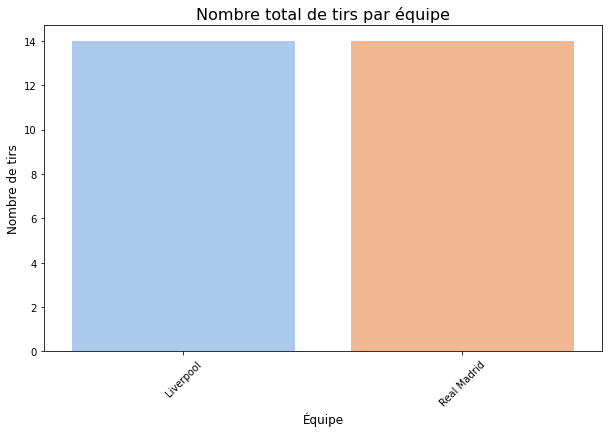

In [69]:
#1 Analyse des tirs

#1 : Tirs par équipe et joueur
shots_by_team = shot_details_df.groupby('team').size().reset_index(name='total_shots')
shots_by_player = shot_details_df.groupby(['team', 'player']).size().reset_index(name='total_shots')

# Nombre de tirs par équipe
plt.figure(figsize=(10, 6))
sns.barplot(data=shots_by_team, x='team', y='total_shots', palette='pastel')
plt.title("Nombre total de tirs par équipe", fontsize=16)
plt.xlabel("Équipe", fontsize=12)
plt.ylabel("Nombre de tirs", fontsize=12)
plt.xticks(rotation=45)
plt.show()


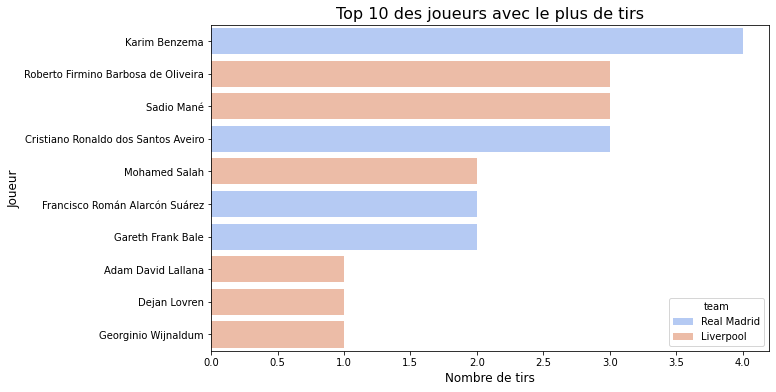

In [70]:
# Top 10 des joueurs avec le plus de tirs
top_players = shots_by_player.sort_values('total_shots', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(data=top_players, x='total_shots', y='player', hue='team', dodge=False, palette='coolwarm')
plt.title("Top 10 des joueurs avec le plus de tirs", fontsize=16)
plt.xlabel("Nombre de tirs", fontsize=12)
plt.ylabel("Joueur", fontsize=12)
plt.show()

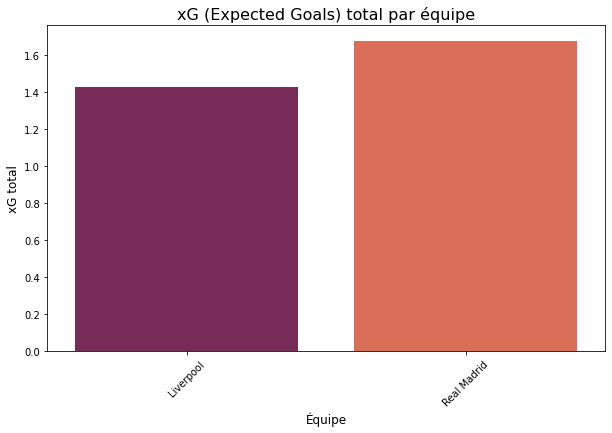

In [71]:
#2 : Analyse des expected goals (xG)
xg_by_team = shot_details_df.groupby('team')['xg'].sum().reset_index(name='total_xg')

# xG par équipe
plt.figure(figsize=(10, 6))
sns.barplot(data=xg_by_team, x='team', y='total_xg', palette='rocket')
plt.title("xG (Expected Goals) total par équipe", fontsize=16)
plt.xlabel("Équipe", fontsize=12)
plt.ylabel("xG total", fontsize=12)
plt.xticks(rotation=45)
plt.show()

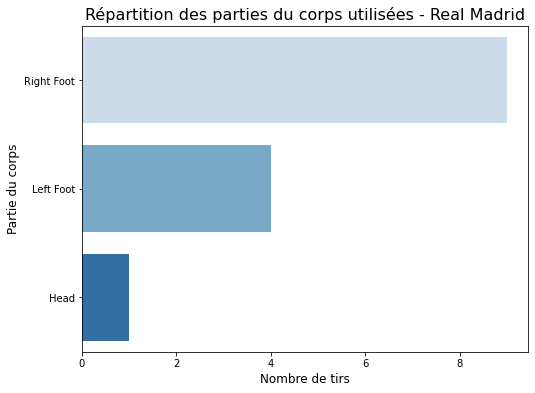

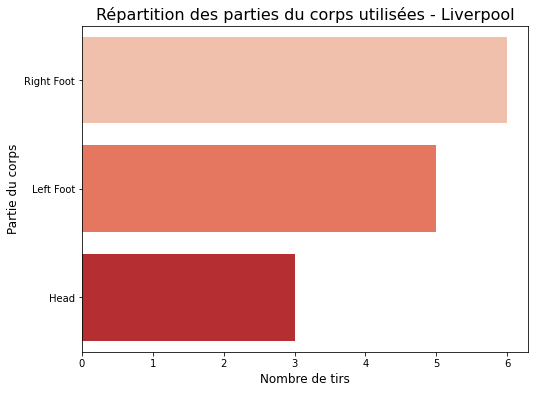

In [72]:
#3 : Analyse des parties du corps utilisées pour les tirs

real_madrid_shots = shot_details_df[shot_details_df['team'] == 'Real Madrid']
liverpool_shots = shot_details_df[shot_details_df['team'] == 'Liverpool']

# Calcul de la distribution des parties du corps pour chaque équipe
real_madrid_body_part_dist = real_madrid_shots['body_part'].value_counts().reset_index()
real_madrid_body_part_dist.columns = ['body_part', 'count']

liverpool_body_part_dist = liverpool_shots['body_part'].value_counts().reset_index()
liverpool_body_part_dist.columns = ['body_part', 'count']

# Répartition des parties du corps utilisées par le Real Madrid
plt.figure(figsize=(8, 6))
sns.barplot(data=real_madrid_body_part_dist, x='count', y='body_part', palette='Blues')
plt.title("Répartition des parties du corps utilisées - Real Madrid", fontsize=16)
plt.xlabel("Nombre de tirs", fontsize=12)
plt.ylabel("Partie du corps", fontsize=12)
plt.show()

# Répartition des parties du corps utilisées par Liverpool
plt.figure(figsize=(8, 6))
sns.barplot(data=liverpool_body_part_dist, x='count', y='body_part', palette='Reds')
plt.title("Répartition des parties du corps utilisées - Liverpool", fontsize=16)
plt.xlabel("Nombre de tirs", fontsize=12)
plt.ylabel("Partie du corps", fontsize=12)
plt.show()


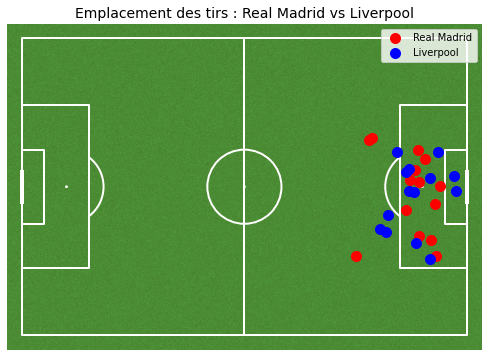

In [73]:
# Étape 4 : Heatmap des positions des tirs

# Séparer les tirs par équipe
real_madrid_shots = shot_details_df[shot_details_df['team'] == 'Real Madrid']
liverpool_shots = shot_details_df[shot_details_df['team'] == 'Liverpool']

# Initialiser la figure et le terrain
fig, ax = plt.subplots(figsize=(10, 6))
pitch = Pitch(pitch_type='statsbomb', pitch_color='grass', line_color='white')
pitch.draw(ax=ax)

# Placer les tirs de chaque équipe
# Emplacement des tirs pour le Real Madrid
pitch.scatter(
    real_madrid_shots['location_x'],
    real_madrid_shots['location_y'],
    ax=ax, color='red', label='Real Madrid', s=100
)

# Emplacement des tirs pour Liverpool
pitch.scatter(
    liverpool_shots['location_x'],
    liverpool_shots['location_y'],
    ax=ax, color='blue', label='Liverpool', s=100
)

plt.legend(loc='upper right')
plt.title('Emplacement des tirs : Real Madrid vs Liverpool', fontsize=14)
plt.show()



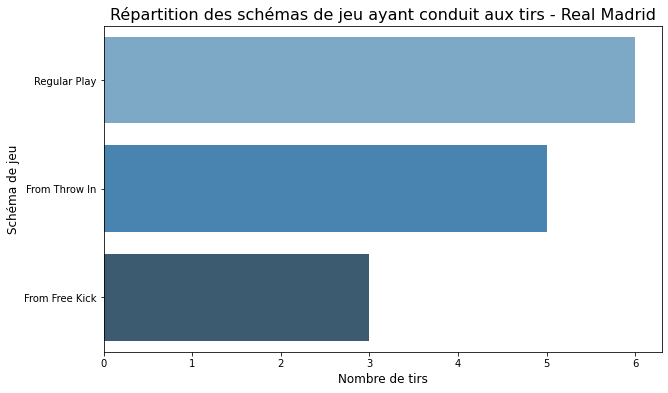

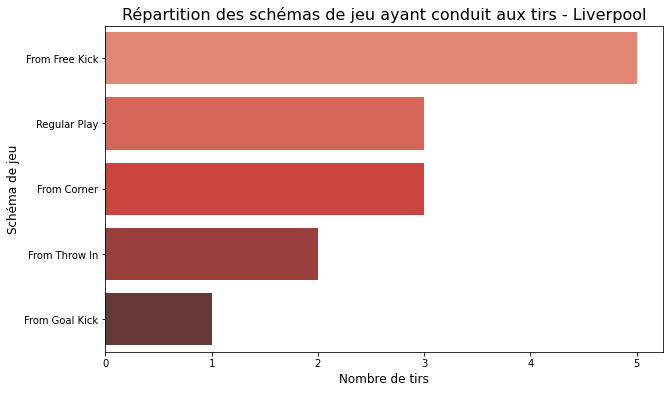

In [74]:
# 5 : Analyse des schémas de jeu ayant conduit aux tirs

# Séparation des tirs par équipe
real_madrid_patterns = real_madrid_shots['play_pattern'].value_counts().reset_index()
real_madrid_patterns.columns = ['play_pattern', 'count']

liverpool_patterns = liverpool_shots['play_pattern'].value_counts().reset_index()
liverpool_patterns.columns = ['play_pattern', 'count']

# Répartition des schémas de jeu pour le Real Madrid
plt.figure(figsize=(10, 6))
sns.barplot(data=real_madrid_patterns, x='count', y='play_pattern', palette='Blues_d')
plt.title("Répartition des schémas de jeu ayant conduit aux tirs - Real Madrid", fontsize=16)
plt.xlabel("Nombre de tirs", fontsize=12)
plt.ylabel("Schéma de jeu", fontsize=12)
plt.show()

# Répartition des schémas de jeu pour Liverpool
plt.figure(figsize=(10, 6))
sns.barplot(data=liverpool_patterns, x='count', y='play_pattern', palette='Reds_d')
plt.title("Répartition des schémas de jeu ayant conduit aux tirs - Liverpool", fontsize=16)
plt.xlabel("Nombre de tirs", fontsize=12)
plt.ylabel("Schéma de jeu", fontsize=12)
plt.show()


In [75]:
# Calcul des statistiques pour le Real Madrid
real_madrid_stats = {
    'total_shots': len(real_madrid_shots),
    'total_xg': real_madrid_shots['xg'].sum(),
    'average_xg': real_madrid_shots['xg'].mean(),
    'shots_on_target': len(real_madrid_shots[real_madrid_shots['outcome'] == 'On Target']),
    'goals': len(real_madrid_shots[real_madrid_shots['outcome'] == 'Goal']),
}

# Calcul des statistiques pour Liverpool
liverpool_stats = {
    'total_shots': len(liverpool_shots),
    'total_xg': liverpool_shots['xg'].sum(),
    'average_xg': liverpool_shots['xg'].mean(),
    'shots_on_target': len(liverpool_shots[liverpool_shots['outcome'] == 'On Target']),
    'goals': len(liverpool_shots[liverpool_shots['outcome'] == 'Goal']),
}


print("Statistiques des tirs du Real Madrid:")
for key, value in real_madrid_stats.items():
    print(f"{key}: {value:.2f}" if isinstance(value, float) else f"{key}: {value}")

print("\nStatistiques des tirs de Liverpool:")
for key, value in liverpool_stats.items():
    print(f"{key}: {value:.2f}" if isinstance(value, float) else f"{key}: {value}")


Statistiques des tirs du Real Madrid:
total_shots: 14
total_xg: 1.68
average_xg: 0.12
shots_on_target: 0
goals: 3

Statistiques des tirs de Liverpool:
total_shots: 14
total_xg: 1.43
average_xg: 0.10
shots_on_target: 0
goals: 1


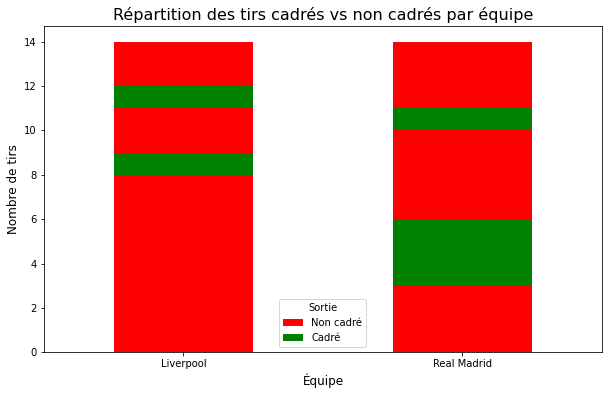

In [76]:
# Analyse des tirs cadrés et non cadrés
shots_cadre = shot_details_df.groupby(['team', 'outcome']).size().unstack(fill_value=0)


shots_cadre.plot(kind='bar', stacked=True, figsize=(10, 6), color=['red', 'green'])
plt.title('Répartition des tirs cadrés vs non cadrés par équipe', fontsize=16)
plt.xlabel('Équipe', fontsize=12)
plt.ylabel('Nombre de tirs', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Sortie', labels=['Non cadré', 'Cadré'])
plt.show()


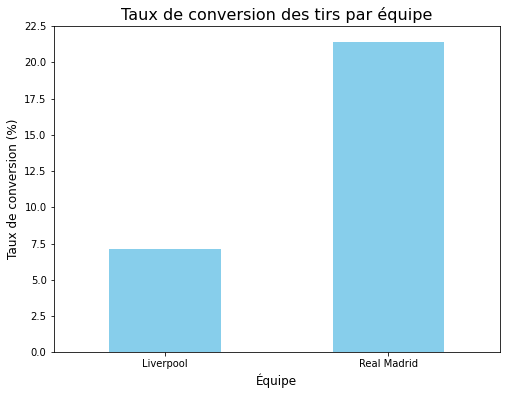

In [77]:
# Calcul du taux de conversion des tirs
conversion_rate = shot_details_df[shot_details_df['outcome'] == 'Goal'].groupby('team').size() / \
                  shot_details_df.groupby('team').size() * 100


conversion_rate.plot(kind='bar', color='skyblue', figsize=(8, 6))
plt.title('Taux de conversion des tirs par équipe', fontsize=16)
plt.xlabel('Équipe', fontsize=12)
plt.ylabel('Taux de conversion (%)', fontsize=12)
plt.xticks(rotation=0)
plt.show()


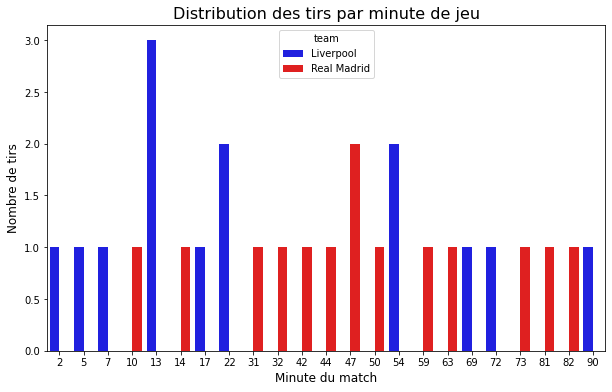

In [78]:
# Distribution des tirs par minute
shot_details_df['minute'] = shot_details_df['minute'].astype(int)
plt.figure(figsize=(10, 6))
sns.countplot(data=shot_details_df, x='minute', hue='team', palette=['blue', 'red'])
plt.title('Distribution des tirs par minute de jeu', fontsize=16)
plt.xlabel('Minute du match', fontsize=12)
plt.ylabel('Nombre de tirs', fontsize=12)
plt.show()


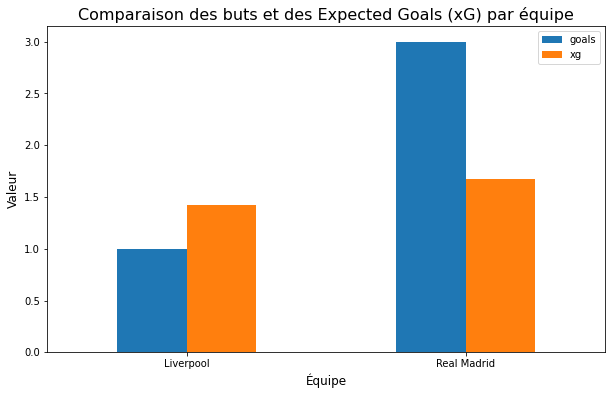

In [79]:
# Comparaison des buts avec les Expected Goals
xg_comparison = shot_details_df.groupby('team').agg(
    goals=('outcome', lambda x: (x == 'Goal').sum()),
    xg=('xg', 'sum')
)


xg_comparison[['goals', 'xg']].plot(kind='bar', figsize=(10, 6))
plt.title('Comparaison des buts et des Expected Goals (xG) par équipe', fontsize=16)
plt.xlabel('Équipe', fontsize=12)
plt.ylabel('Valeur', fontsize=12)
plt.xticks(rotation=0)
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


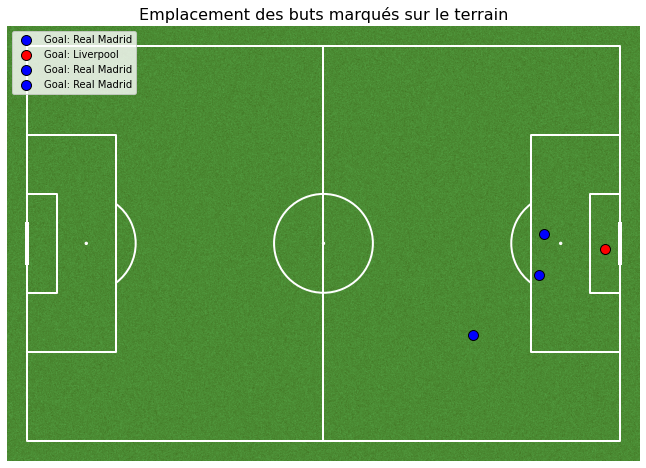

In [87]:
# Sélection des tirs qui sont des buts
goals_df = shot_details_df[shot_details_df['outcome'] == 'Goal']

# Initialiser le terrain
pitch = Pitch(pitch_type='statsbomb', pitch_color='grass', line_color='white')
fig, ax = plt.subplots(figsize=(12, 8))
pitch.draw(ax=ax)

# Ajout des buts marqués sur le terrain avec des couleurs différentes pour chaque équipe
for _, goal in goals_df.iterrows():
    x = goal['location_x']
    y = goal['location_y']
    team = goal['team']
    
    if team == 'Real Madrid': 
        color = 'blue'
    elif team == 'Liverpool':  
        color = 'red'
    else:
        color = 'green'
        
    ax.scatter(x, y, color=color, s=100, label=f'Goal: {team}' if team not in [label.get_text() for label in ax.legend().get_texts()] else "", edgecolors='black')


plt.title('Emplacement des buts marqués sur le terrain', fontsize=16)
plt.legend(loc='upper left')
plt.show()



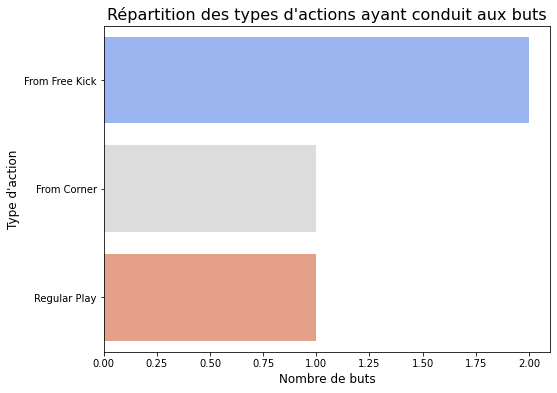

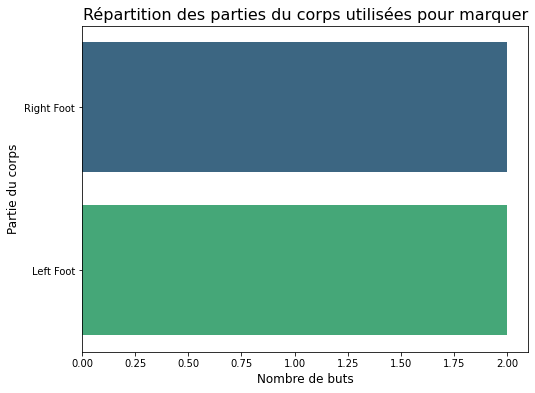

In [88]:
# Analyser les types d'actions qui ont mené aux buts
play_pattern_goals = goals_df['play_pattern'].value_counts().reset_index()
play_pattern_goals.columns = ['play_pattern', 'goal_count']

# Analyser la partie du corps utilisée pour marquer
body_part_goals = goals_df['body_part'].value_counts().reset_index()
body_part_goals.columns = ['body_part', 'goal_count']

# Visualisation de la répartition des types d'actions
plt.figure(figsize=(8, 6))
sns.barplot(data=play_pattern_goals, x='goal_count', y='play_pattern', palette='coolwarm')
plt.title("Répartition des types d'actions ayant conduit aux buts", fontsize=16)
plt.xlabel("Nombre de buts", fontsize=12)
plt.ylabel("Type d'action", fontsize=12)
plt.show()

# Visualisation de la répartition des parties du corps utilisées pour marquer
plt.figure(figsize=(8, 6))
sns.barplot(data=body_part_goals, x='goal_count', y='body_part', palette='viridis')
plt.title("Répartition des parties du corps utilisées pour marquer", fontsize=16)
plt.xlabel("Nombre de buts", fontsize=12)
plt.ylabel("Partie du corps", fontsize=12)
plt.show()


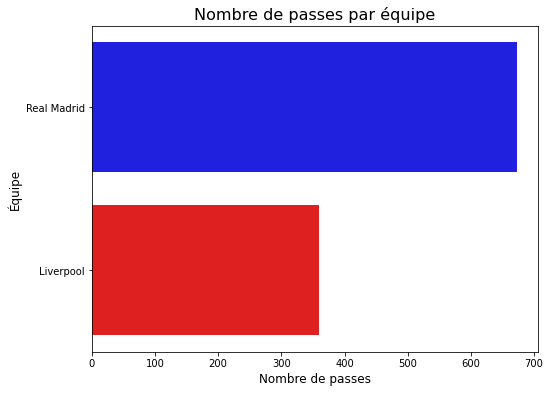

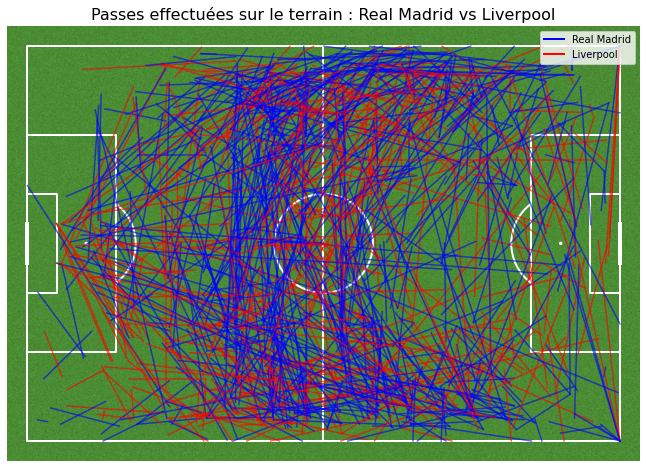

In [103]:
# Analyse des passes : Nombre de passes par équipe
team_pass_count = passes_details_df['team'].value_counts().reset_index()
team_pass_count.columns = ['team', 'pass_count']

# Répartition du nombre de passes par équipe
plt.figure(figsize=(8, 6))
sns.barplot(data=team_pass_count, x='pass_count', y='team', palette=['blue', 'red'])
plt.title("Nombre de passes par équipe", fontsize=16)
plt.xlabel("Nombre de passes", fontsize=12)
plt.ylabel("Équipe", fontsize=12)
plt.show()

# Visualisation des passes sur le terrain
# Initialiser le terrain de foot
pitch = Pitch(pitch_type='statsbomb', pitch_color='grass', line_color='white')
fig, ax = plt.subplots(figsize=(12, 8))

pitch.draw(ax=ax)

# Définir les couleurs pour le Real Madrid et Liverpool
team_colors = {
    'Real Madrid': 'blue', 
    'Liverpool': 'red'      
}

# Ajouter les passes effectuées (de l'origine à la destination) par équipe
for _, pass_event in passes_details_df.iterrows():
    x_start = pass_event['start_x']
    y_start = pass_event['start_y']
    x_end = pass_event['end_x']
    y_end = pass_event['end_y']
    team = pass_event['team']  
    color = team_colors.get(team, 'gray') 

    ax.plot([x_start, x_end], [y_start, y_end], color=color, alpha=0.6)

# Légende pour différencier les équipes
legend_patches = [plt.Line2D([0], [0], color=color, lw=2, label=team) for team, color in team_colors.items()]
ax.legend(handles=legend_patches, loc='upper right')

plt.title('Passes effectuées sur le terrain : Real Madrid vs Liverpool', fontsize=16)
plt.show()


In [96]:
# Compter le nombre de passes par joueur
passes_count = passes_df['player'].apply(lambda x: x['name'] if isinstance(x, dict) and 'name' in x else None).value_counts()

# Extraire le top 10 des joueurs ayant réalisé le plus de passes
top_10_passers = passes_count.head(10)

top_10_passers_df = top_10_passers.reset_index()
top_10_passers_df.columns = ['Joueur', 'Nombre de Passes']

print(top_10_passers_df)


                            Joueur  Nombre de Passes
0                       Toni Kroos                92
1              Sergio Ramos García                85
2   Marcelo Vieira da Silva Júnior                84
3                      Luka Modrić                72
4                   Raphaël Varane                62
5  José Ignacio Fernández Iglesias                53
6   Francisco Román Alarcón Suárez                50
7           Trent Alexander-Arnold                44
8           Jordan Brian Henderson                42
9                 Andrew Robertson                40


In [ ]:
#Analyse sur un joueur clé du match: Marcelo

C:\Users\darko\AppData\Local\Temp/ipykernel_18784/4056936461.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marcelo_passes['location_x'] = marcelo_passes['location'].apply(lambda loc: loc[0] if loc else None)
C:\Users\darko\AppData\Local\Temp/ipykernel_18784/4056936461.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marcelo_passes['location_y'] = marcelo_passes['location'].apply(lambda loc: loc[1] if loc else None)
C:\Users\darko\AppData\Local\Temp/ipykernel_18784/4056936461.py:13: SettingWithCopyW

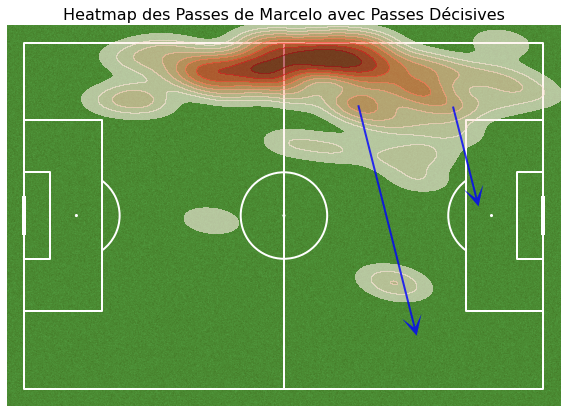

In [91]:
# Filtrer les passes de Marcelo
marcelo_passes = passes_df[passes_df['player'].apply(lambda x: x['name']) == 'Marcelo Vieira da Silva Júnior']

# Récupérer les coordonnées des passes
marcelo_passes['location_x'] = marcelo_passes['location'].apply(lambda loc: loc[0] if loc else None)
marcelo_passes['location_y'] = marcelo_passes['location'].apply(lambda loc: loc[1] if loc else None)

# Identifier les passes décisives par leur ID
assist_ids = ['ff375f8e-d488-4442-b7a6-73c7283fc371', 'c3ace7b4-1cb2-471b-b910-85322bd0dac8']
assist_passes = passes_df[passes_df['id'].isin(assist_ids)]

# Extraire les coordonnées des passes décisives
assist_passes['start_x'] = assist_passes['location'].apply(lambda loc: loc[0] if loc else None)
assist_passes['start_y'] = assist_passes['location'].apply(lambda loc: loc[1] if loc else None)
assist_passes['end_x'] = assist_passes['pass'].apply(lambda p: p['end_location'][0] if p and 'end_location' in p else None)
assist_passes['end_y'] = assist_passes['pass'].apply(lambda p: p['end_location'][1] if p and 'end_location' in p else None)

# Création du terrain
pitch = Pitch(pitch_type='statsbomb', pitch_color='grass', line_color='white')
fig, ax = plt.subplots(figsize=(10, 7))
pitch.draw(ax=ax)

# Ajouter la heatmap des passes de Marcelo
sns.kdeplot(
    x=marcelo_passes['location_x'],
    y=marcelo_passes['location_y'],
    fill=True,
    cmap="Reds",
    alpha=0.6,
    bw_adjust=0.5,
    ax=ax
)

# Ajouter les passes décisives sur le terrain
for _, row in assist_passes.iterrows():
    pitch.arrows(
        row['start_x'], row['start_y'], row['end_x'], row['end_y'],
        width=2, headwidth=10, headlength=10, color='blue', alpha=0.8, ax=ax
    )

plt.title("Heatmap des Passes de Marcelo avec Passes Décisives", fontsize=16)
plt.show()


C:\Users\darko\AppData\Local\Temp/ipykernel_18784/537326453.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marcelo_tackles['location_x'] = marcelo_tackles['location'].apply(lambda loc: loc[0] if loc else None)
C:\Users\darko\AppData\Local\Temp/ipykernel_18784/537326453.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marcelo_tackles['location_y'] = marcelo_tackles['location'].apply(lambda loc: loc[1] if loc else None)


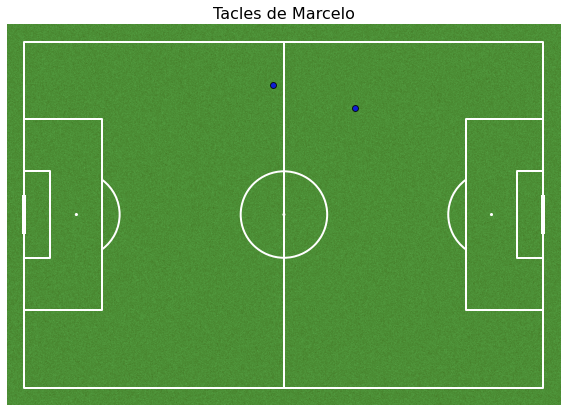

In [84]:
# Filtrer les tacles effectués par Marcelo
tackles_df = events_df[events_df['type'].apply(lambda x: x['name']) == 'Duel']
marcelo_tackles = tackles_df[tackles_df['player'].apply(lambda x: x['name']) == 'Marcelo Vieira da Silva Júnior']

# Extraire les coordonnées des tacles
marcelo_tackles['location_x'] = marcelo_tackles['location'].apply(lambda loc: loc[0] if loc else None)
marcelo_tackles['location_y'] = marcelo_tackles['location'].apply(lambda loc: loc[1] if loc else None)

# Visualiser les tacles sur le terrain
pitch = Pitch(pitch_type='statsbomb', pitch_color='grass', line_color='white')
fig, ax = plt.subplots(figsize=(10, 7))
pitch.draw(ax=ax)

# Ajouter les tacles de Marcelo
pitch.scatter(
    marcelo_tackles['location_x'],
    marcelo_tackles['location_y'],
    alpha=0.8,
    color='blue',
    edgecolor='black',
    ax=ax
)


plt.title("Tacles de Marcelo", fontsize=16)
plt.show()


C:\Users\darko\AppData\Local\Temp/ipykernel_18784/2048182862.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marcelo_interceptions['location_x'] = marcelo_interceptions['location'].apply(lambda loc: loc[0] if loc else None)
C:\Users\darko\AppData\Local\Temp/ipykernel_18784/2048182862.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marcelo_interceptions['location_y'] = marcelo_interceptions['location'].apply(lambda loc: loc[1] if loc else None)


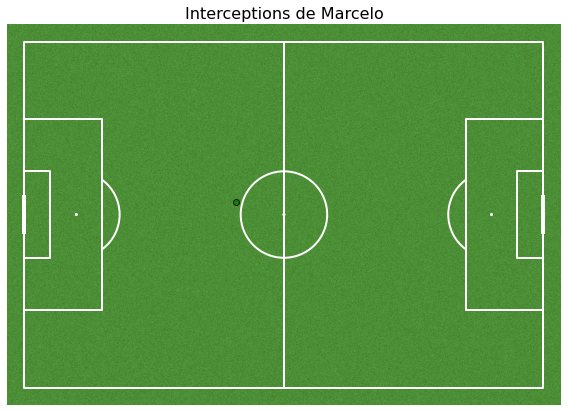

In [85]:
# Filtrer les interceptions effectuées par Marcelo
interceptions_df = events_df[events_df['type'].apply(lambda x: x['name']) == 'Interception']
marcelo_interceptions = interceptions_df[interceptions_df['player'].apply(lambda x: x['name']) == 'Marcelo Vieira da Silva Júnior']

# Extraire les coordonnées des interceptions
marcelo_interceptions['location_x'] = marcelo_interceptions['location'].apply(lambda loc: loc[0] if loc else None)
marcelo_interceptions['location_y'] = marcelo_interceptions['location'].apply(lambda loc: loc[1] if loc else None)

# Visualiser les interceptions sur le terrain
fig, ax = plt.subplots(figsize=(10, 7))
pitch.draw(ax=ax)

# Ajouter les interceptions de Marcelo
pitch.scatter(
    marcelo_interceptions['location_x'],
    marcelo_interceptions['location_y'],
    alpha=0.8,
    color='green',
    edgecolor='black',
    ax=ax
)


plt.title("Interceptions de Marcelo", fontsize=16)
plt.show()


In [86]:
# Filtrer les duels gagnés par Marcelo
duels_won_df = tackles_df[tackles_df['outcome'].apply(lambda x: x['name'] if x else None) == 'Won']
marcelo_duels_won = duels_won_df[duels_won_df['player'].apply(lambda x: x['name']) == 'Marcelo Vieira da Silva Júnior']

# Ajouter les coordonnées des duels gagnés
marcelo_duels_won['location_x'] = marcelo_duels_won['location'].apply(lambda loc: loc[0] if loc else None)
marcelo_duels_won['location_y'] = marcelo_duels_won['location'].apply(lambda loc: loc[1] if loc else None)

# Visualiser les duels gagnés sur le terrain
fig, ax = plt.subplots(figsize=(10, 7))
pitch.draw(ax=ax)

# Ajouter les duels gagnés
pitch.scatter(
    marcelo_duels_won['location_x'],
    marcelo_duels_won['location_y'],
    alpha=0.8,
    color='purple',
    edgecolor='black',
    ax=ax
)


plt.title("Duels Gagnés par Marcelo", fontsize=16)
plt.show()


KeyError: 'outcome'

NameError: name 'marcelo_duels_won' is not defined

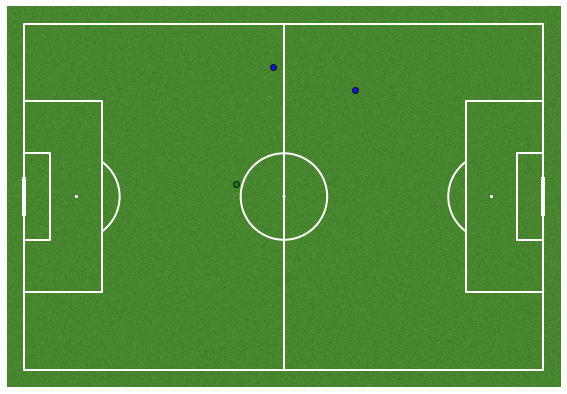

In [92]:
fig, ax = plt.subplots(figsize=(10, 7))
pitch.draw(ax=ax)

# Ajouter les tacles (bleu)
pitch.scatter(
    marcelo_tackles['location_x'],
    marcelo_tackles['location_y'],
    alpha=0.8,
    color='blue',
    edgecolor='black',
    label='Tacles',
    ax=ax
)

# Ajouter les interceptions (vert)
pitch.scatter(
    marcelo_interceptions['location_x'],
    marcelo_interceptions['location_y'],
    alpha=0.8,
    color='green',
    edgecolor='black',
    label='Interceptions',
    ax=ax
)

# Ajouter les duels gagnés (violet)
pitch.scatter(
    marcelo_duels_won['location_x'],
    marcelo_duels_won['location_y'],
    alpha=0.8,
    color='purple',
    edgecolor='black',
    label='Duels Gagnés',
    ax=ax
)

# Ajouter une légende et un titre
ax.legend(loc='upper right', fontsize=12)
plt.title("Actions Défensives de Marcelo", fontsize=16)


plt.show()


In [93]:
# Calculer les statistiques du match de Marcelo
stats = {
    'Tacles effectués': len(marcelo_tackles),
    'Interceptions effectuées': len(marcelo_interceptions),
    'Duels gagnés': len(marcelo_duels_won)
}


print("Statistiques Défensives de Marcelo:")
for key, value in stats.items():
    print(f"{key}: {value}")


NameError: name 'marcelo_duels_won' is not defined